# Semi-analytical ON/OFF Analysis

In [2]:
from scipy.special import factorial
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Input parameters only first background
Non =  {'D0':18, 'D1':17, 'D4':11, 'D5':13, 'All Det':59}
Noff = {'D0':12, 'D1':5, 'D4':5, 'D5':4, 'All Det':26}
Ton =  {'D0':22.4, 'D1':21.7, 'D4':27.5, 'D5':28.2, 'All Det':99.8}
Toff = {'D0':22.5, 'D1':22.0, 'D4':27.4, 'D5':28.1, 'All Det':100.0}

# Input parameters three backgrounds:
# Non =  {'D0':18, 'D1':17, 'D4':11, 'D5':13, 'All Det':59}
# Noff = {'D0':36, 'D1':20, 'D4':13, 'D5':15, 'All Det':84}
# Ton =  {'D0':1, 'D1':1, 'D4':1, 'D5':1, 'All Det':4}
# Toff = {'D0':3.099, 'D1':3.503, 'D4':2.787, 'D5':3.057, 'All Det':12.446}
smax_hannah = {'D0':0.87, 'D1':0.86, 'D4':1.16, 'D5':1.31, 'All Det':0.0}

In [14]:
def pMsb(smax, Non, Noff, Ton, Toff):
    '''Probability that model Msb is true'''
    dummy = 0
    for i in range(0,Non+1):
        dummy += ((1+(Toff/Ton))**i * factorial(Non+Noff-i)/factorial(Non-i))
    Osbb = ( factorial(Non) / (smax * Ton * factorial(Non+Noff)) ) * dummy
    return 1. / (1. + (1./Osbb))

In [40]:
# Select detector :
det = 'D0'

# Probability that model Msb is true - The source exists
PSE = [] # Prabability Source Exists
ss = np.linspace(0.01, 1.5, num=100, endpoint=True)
for smax in ss:
    PSE.append(pMsb(smax, Non[det], Noff[det], Ton[det], Toff[det])) # smax, Non, Noff, Ton, Toff

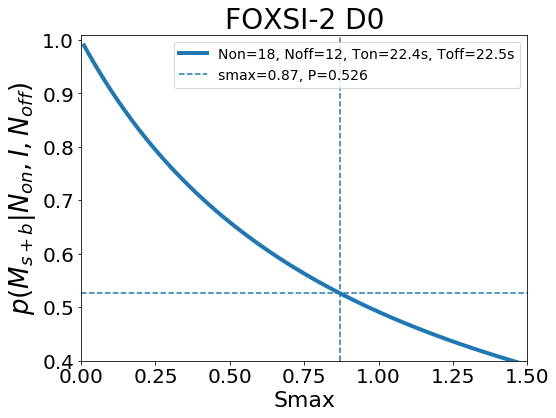

In [41]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(ss,PSE,linewidth=4.0,
        label=f'Non={Non[det]}, Noff={Noff[det]}, Ton={Ton[det]}s, Toff={Toff[det]}s')
ax.axvline(smax_hannah[det],color='tab:blue',ls='--')
ax.axhline(pMsb(smax_hannah[det], Non[det], Noff[det], Ton[det], Toff[det]),
           color='tab:blue',ls='--',
           label=f'smax={smax_hannah[det]}, P={round(pMsb(smax_hannah[det], Non[det], Noff[det], Ton[det], Toff[det]),3)}')
# ornaments
ax.set_xlim(0,ss.max())
ax.set_ylim(0.4,1.01)
#ax.set_ylim(0,0.46)
ax.set_xlabel('Smax',fontsize=22)
ax.set_ylabel('$p(M_{s+b} |N_{on},I, N_{off})$',fontsize=26)
ax.tick_params(axis='both', labelsize=20)
ax.set_title(f'FOXSI-2 {det}',fontsize=28)
ax.legend(fontsize=14)
plt.show()
fig.savefig(f'images/{det}_FMsbTrue.pdf',bbox_inches='tight',dpi=300)
plt.close(fig)

## Bg1/Bg2 

In [6]:
# Probability that model Msb is true - The source exists
PSE = [] # Prabability Source Exists
ss = np.linspace(0.01, 30, num=100, endpoint=True)
for smax in ss:
    PSE.append(pMsb(smax, 26, 9, 1, 0.53)) # smax, Non, Noff, Ton, Toff

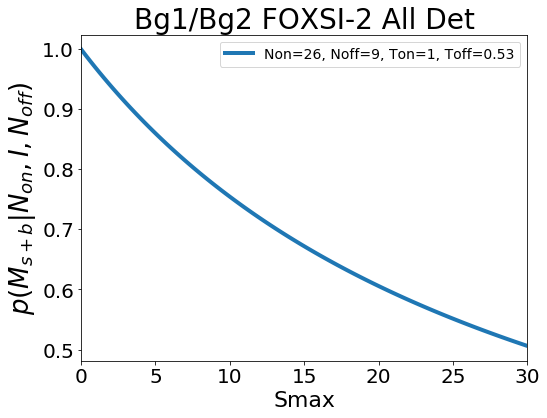

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(ss,PSE,linewidth=4.0,label=f'Non=26, Noff=9, Ton=1, Toff=0.53')
# ornaments
ax.set_xlim(0,ss.max())
#ax.set_ylim(0,0.46)
ax.set_xlabel('Smax',fontsize=22)
ax.set_ylabel('$p(M_{s+b} |N_{on},I, N_{off})$',fontsize=26)
ax.tick_params(axis='both', labelsize=20)
ax.set_title(f'Bg1/Bg2 FOXSI-2 {det}',fontsize=28)
ax.legend(fontsize=14)
plt.show()
fig.savefig(f'images/{det}_Bg1_Bg2.pdf',bbox_inches='tight',dpi=300)
plt.close(fig)

# Crap

In [8]:
# FOXSI-2 Det6
smax = 4.2156
pMsb_411 = []
for Non in Nons:
    pMsb_411.append(pMsb(smax, Non, 4, 1, FToff)) # Non, Noff, Ton, Toff
pMsb_311 = []
for Non in Nons:
    pMsb_311.append(pMsb(smax, Non, 3, 1, FToff)) # Non, Noff, Ton, Toff

fig, ax = plt.subplots(figsize=(7,5))
ax.step(Nons,pMsb_411, where='post',linewidth=4.0,label='Noff=4, Ton=1, Toff='+str(round(FToff,2))+', R=700"')
#ax.step(Nons,pMsb_311, where='post',linewidth=4.0,label='Noff=3, Ton=1, Toff='+str(round(FToff,2))+', R=600"')
ax.axhline(pMsb(smax, 4, 4, 1, FToff),color='tab:blue',ls='--')
#ax.axhline(pMsb(smax, 6, 3, 1, FToff),color='tab:orange',ls='--')
# ornaments
ax.set_xlim(0,15)
ax.set_ylim(0,1.1)
ax.set_xlabel('$N_{on}$ (counts)',fontsize=22)
ax.set_ylabel('$p(M_{s+b} |N_{on},I, N_{off})$',fontsize=26)
ax.tick_params(axis='both', labelsize=20)
ax.set_title('FOXSI-2, det6, $s_{max}$ = '+str(smax),fontsize=26)
ax.legend(fontsize=12,loc='best')
plt.show()
fig.savefig('FMsbTrue.pdf',bbox_inches='tight',dpi=300)
plt.close(fig)

NameError: name 'Nons' is not defined

In [ ]:
# FOXSI-2 Det6
pge1_411 = []
for Non in Nons:
    pge1_411.append(pge1( Non, 4, 1, FToff)) # Non, Noff, Ton, Toff
pge1_311 = []
for Non in Nons:
    pge1_311.append(pge1( Non, 3, 1, FToff)) # Non, Noff, Ton, Toff

fig, ax = plt.subplots(figsize=(7,5))
ax.step(Nons,pge1_411, where='post',linewidth=4.0,label='Noff=4, Ton=1, Toff='+str(round(FToff,2))+', R=700"')
#ax.step(Nons,pge1_311, where='post',linewidth=4.0,label='Noff=3, Ton=1, Toff='+str(round(FToff,2))+', R=600"')
ax.axhline(pge1( 4, 4, 1, FToff),color='tab:blue',ls='--')
#ax.axhline(pge1( 6, 3, 1, FToff),color='tab:orange',ls='--')
# ornaments
ax.set_xlim(0,15)
ax.set_ylim(0,1.1)
ax.set_xlabel('$N_{on}$ (counts)',fontsize=22)
ax.set_ylabel('$p(i\geq 1 |N_{on},I)$',fontsize=26)
ax.tick_params(axis='both', labelsize=20)
ax.set_title('FOXSI-2 det6',fontsize=28)
ax.legend(fontsize=14,loc='best')
plt.show()
fig.savefig('Fatleastone.pdf',bbox_inches='tight',dpi=300)
plt.close(fig)

In [ ]:
# FOXSI-2 Det6
FToff = 2.5818
PsNon4511 = []
for s in ss:
    PsNon4511.append(SourceRate(s, 4, 4, 1, FToff)) # s, Non, Noff, Ton, Toff

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(ss,PsNon4511,linewidth=4.0,label='Non=4, Noff=4, Ton=1, Toff='+str(round(FToff,2))+', R=700"')
# ornaments
ax.set_xlim(0,16)
ax.set_ylim(0,0.46)
ax.set_xlabel('source photons during T4 obs.',fontsize=22)
ax.set_ylabel('$p(s|N_{on},I)$',fontsize=26)
ax.tick_params(axis='both', labelsize=20)
ax.set_title('FOXSI-2 det6',fontsize=28)
ax.legend(fontsize=14)
plt.show()
fig.savefig('Fsignal_rate.pdf',bbox_inches='tight',dpi=300)
plt.close(fig)

In [ ]:
def C(i, Non, Noff, Ton, Toff):
    '''probability that i of the ON measurement events are due to the source'''
    denominator=0
    for j in range (0,Non+1):
        denominator += ((1+(Toff/Ton))**j * factorial(Non+Noff-j)/factorial(Non-j) )
    return ((1+(Toff/Ton))**i * factorial(Non+Noff-i)/factorial(Non-i)) / denominator

def SourceRate(s, Non, Noff, Ton, Toff):
    PsNon = 0 
    for i in range (0,Non+1):
        PsNon += C(i, Non, Noff, Ton, Toff) * ( (s*Ton)**i * np.exp(-s*Ton) ) / (factorial(i))
    return Ton*PsNon